In [54]:
import numpy as np
import pickle
import string 

In [55]:
def transform_input_text(self, texts):
    temp = []
    for line in texts:
        x = []
        for word in line.lower().split(' '):
            wid = 1
            if word in self.input_word2idx:
                wid = self.input_word2idx[word]
            x.append(wid)
            if len(x) >= self.max_input_seq_length:
                break
        temp.append(x)
    temp = pad_sequences(temp, maxlen=self.max_input_seq_length)

    print(temp.shape)
    return temp

In [56]:
import numpy as np
import os

def split():
    titles = []
    texts = []
    root = 'Part1'
    stop = 0
    for p1 in os.listdir(root)[1:]:
        if(stop == 1):
            break
        dir1 = root + '/' + str(p1)
        print(dir1)
        for p2 in os.listdir(dir1)[1:]:
            if(stop == 1):
                break
            dir2 = dir1 + '/' + str(p2)
            print(dir2)
            for filename in os.listdir(dir2)[1:]:
                if (filename == 'a9302502.txt'):
                    stop = 1
                    break
                print(dir2 + '/' + filename)
                #print(iter)
                #iter += 1
                #print(dirs[1:])
                #filename = 'Part1/awards_1990/awd_1990_00/a9000006.txt'
                f = open(dir2 + '/' + filename)
                addTitle = False
                addTexts = False
                title = []
                text = []
                for word in f.read().split():
                    if (word == "Title"):
                        addTitle = True
                        continue

                    if (word == "\n"):
                        addTitle = False
                    if (word == "Type"):
                        addTitle = False
                        
#                     if (addTexts == True and word == "\n"):
#                         addTexts = False
#                         break
                        

                    if (word == "Abstract"):
                        addTexts = True
                        continue

                    if(addTitle == True):
                        title.append(word)

                    if(addTexts == True):
                        text.append(word)

                for i in range(len(title)):
                    s = title[i]
                    table = str.maketrans({key: None for key in string.punctuation})
                    new_s = s.translate(table)
                    title[i] = new_s
                for i in range(len(text)):
                    s = text[i]
                    table = str.maketrans({key: None for key in string.punctuation})
                    new_s = s.translate(table)
                    text[i] = new_s

                title = ' '.join(title)
                text =' '.join(text)
                titles.append(title)
                texts.append(text)

#     f=open("titles.txt", 'w')
#     for i in titles:
#         f.write(i)
#         f.write(' ')

#     t=open("texts.txt", 'w')
#     for i in texts:
#         t.write(i)
#         t.write(' ')

#     f.close()
#     t.close()
    return titles, texts


In [57]:
import numpy as np
import os

def split():
    titles = []
    texts = []
    root = 'Part1'
    
    #dirr = 'Part1/awards_1990/awd_1990_00/'
    dirs = os.listdir('Part1/awards_1990/awd_1990_00/')

    for filename in dirs[1:]:
    #iter = 0
    #print(dirs[1])
            
                #print(iter)
                #iter += 1
                #print(dirs[1:])
                #filename = 'Part1/awards_1990/awd_1990_00/a9000006.txt'
        f = open('Part1/awards_1990/awd_1990_00/' + str(filename))
        addTitle = False
        addTexts = False
        title = []
        text = []
        for word in f.read().split():
            if (word == "Title"):
                addTitle = True
                continue

            if (word == "Type"):
                addTitle = False

#             if (addTexts == True and word == "\n"):
#                 addTexts = False
#                 break


            if (word == "Abstract"):
                addTexts = True
                continue

            if(addTitle == True):
                title.append(word)

            if(addTexts == True):
                text.append(word)

        for i in range(len(title)):
            s = title[i]
            table = str.maketrans({key: None for key in string.punctuation})
            new_s = s.translate(table)
            title[i] = new_s
        for i in range(len(text)):
            s = text[i]
            table = str.maketrans({key: None for key in string.punctuation})
            new_s = s.translate(table)
            text[i] = new_s

        title = ' '.join(title)
        text =' '.join(text)
        titles.append(title)
        texts.append(text)

#     f=open("titles.txt", 'w')
#     for i in titles:
#         f.write(i)
#         f.write(' ')

#     t=open("texts.txt", 'w')
#     for i in texts:
#         t.write(i)
#         t.write(' ')

#     f.close()
#     t.close()
    return titles, texts


In [58]:
if __name__ == '__main__':
    titles, texts = split()


In [59]:
print(len(titles))

379


In [60]:
from collections import Counter
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return list(vocab), vocabcount

In [61]:
titles[1]

' RFLP Patterns as a Measure of Diversity in Small Populations'

In [62]:
vocab, vocabcount = get_vocab(titles+texts)

In [63]:
print(vocab[:5])
print(len(vocab))

['the', 'of', 'and', 'to', 'in']
9073


In [64]:
import string 
for i in range(len(vocab)):
    s = vocab[i]
    table = str.maketrans({key: None for key in string.punctuation})
    new_s = s.translate(table)
    vocab[i] = new_s

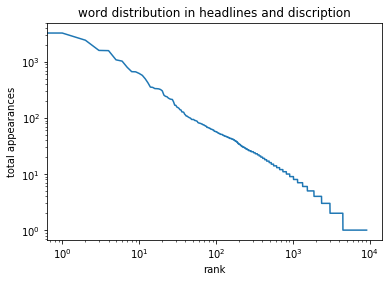

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

In [66]:
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

def get_idx(vocab, vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    
    idx2word = dict((idx,word) for word,idx in word2idx.items())

    return word2idx, idx2word

In [67]:
word2idx, idx2word = get_idx(vocab, vocabcount)

Read Glove

In [68]:
FN  =  'vocabulary-embedding'
seed=42
vocab_size = 40000
embedding_dim = 100
lower = False # dont lower case the text

In [69]:
fname = 'glove.6B.%dd.txt'%embedding_dim
from keras.utils.data_utils import get_file
import os
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/tmp', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
    !unzip {datadir}/{path}

unzip:  cannot find or open /Users/michellezhao/.keras/datasets//Users/michellezhao/.keras/datasets/glove.6B.zip, /Users/michellezhao/.keras/datasets//Users/michellezhao/.keras/datasets/glove.6B.zip.zip or /Users/michellezhao/.keras/datasets//Users/michellezhao/.keras/datasets/glove.6B.zip.ZIP.


In [70]:
import zipfile
zip = zipfile.ZipFile(path)
zip.extractall()

In [71]:
datadir = ''
glove_name = os.path.join(datadir, fname)
glove_n_symbols = sum(1 for line in open(glove_name))

In [74]:
glove_n_symbols

400000

In [75]:
import numpy as np
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale=.1
with open(glove_name, 'r') as fp:
    i = 0
    for l in fp:
        l = l.strip().split()
        w = l[0]
        glove_index_dict[w] = i
        glove_embedding_weights[i,:] = list(map(float,l[1:]))
        i += 1
glove_embedding_weights *= globale_scale

In [76]:
glove_embedding_weights.std()

0.040815727600190289

In [77]:
for w, i in  glove_index_dict.items():
    w = w.lower()
    if w not in glove_index_dict:
        glove_index_dict[w] = i

In [78]:
# generate random embedding with same scale as glove
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = glove_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
print ('random-embedding/glove scale', scale, 'std', embedding.std())

# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    #print(i)
    if(i not in idx2word):
        continue
    w = idx2word[i]
    #print(w)
    g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = glove_embedding_weights[g,:]
        c+=1
print ('number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size))


random-embedding/glove scale 0.0706949139514 std 0.0408138249575
number of tokens, in small vocab, found in glove and copied to embedding 7960 0.199


In [79]:
glove_thr = 0.5
word2glove = {}
for w in word2idx:
    if w in glove_index_dict:
        g = w
    elif w.lower() in glove_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in glove_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in glove_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2glove[w] = g

In [80]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

glove_match = []
for w,idx in word2idx.items():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2glove:
        gidx = glove_index_dict[word2glove[w]]
        gweight = glove_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < glove_thr:
                break
            if idx2word[embedding_idx] in word2glove :
                glove_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
glove_match.sort(key = lambda x: -x[2])
print ('# of glove substitutes found', len(glove_match))

# of glove substitutes found 0


In [81]:
for orig, sub, score in glove_match[-10:]:
    print (score, orig,'=>', idx2word[sub])

In [82]:
glove_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in glove_match)

In [83]:
Y = [[word2idx[token] for token in title.split()] for title in titles]
len(Y)

379

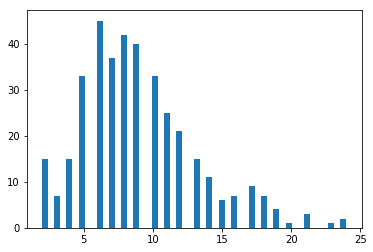

In [84]:
plt.hist(list(map(len,Y)),bins=50);

In [85]:
X = [[word2idx[token] for token in text.split()] for text in texts]
len(X)

379

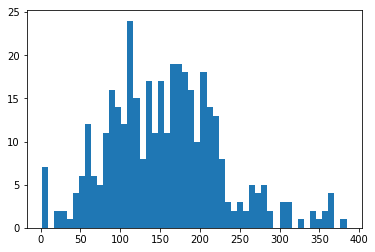

In [86]:
plt.hist(list(map(len,X)),bins=50);

In [87]:
print(embedding)

[[-0.01773875  0.06372642  0.03280158 ..., -0.01024496 -0.06710091
  -0.05544016]
 [-0.06625115  0.01928704 -0.02624818 ...,  0.05614735  0.05473008
   0.03957156]
 [-0.0038194  -0.024487    0.072812   ..., -0.01459     0.08278     0.027062  ]
 ..., 
 [ 0.06982313 -0.02670071 -0.03871925 ..., -0.00267477 -0.01187393
  -0.05748738]
 [ 0.04286668 -0.0481842  -0.01529906 ...,  0.0564503   0.03692646
   0.03450374]
 [ 0.01269256  0.03835368 -0.04946906 ...,  0.01590619 -0.05742016
   0.03449618]]


In [88]:
with open('%s.pkl'%FN,"wb") as fp:
    pickle.dump((embedding, idx2word, word2idx, glove_idx2idx),fp,-1)
    
with open('%s.data.pkl'%FN,"wb") as fp:
    pickle.dump((X,Y),fp,-1)